<a id='top-page'></a>
# <img src="../images/PCAfold-logo.svg" style="height:100px"> Demo for estimating local feature sizes on a manifold

In this tutorial, we demonstrate the utilities for estimating local feature sizes on a manifold from the ``analysis`` module.

- [**Compute the feature sizes map on synthetic datasets**](#data-generation)

***

**Should plots be saved?**

In [1]:
save_plots = True

***

We import the necessary modules:

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
from PCAfold import analysis
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, cmap='coolwarm_r', s=10):
    
    fig = plt.figure(figsize=(24, 6))
    spec = fig.add_gridspec(ncols=7, nrows=1, width_ratios=[1,0.15,0.05,1,0,1,0.15], height_ratios=[1])

    ax = fig.add_subplot(spec[0,0:2])
    scat1 = ax.scatter(xy[:,0], xy[:,1], edgecolors='none', s=s, c=phi.ravel(), cmap='viridis')
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([]);
    ax.set_yticks([]);
    plt.title('True features', fontsize=20)
    cbar = plt.colorbar(scat1)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_title('$\phi$', fontsize=14, rotation=0, horizontalalignment='left')
    
    ax = fig.add_subplot(spec[0,3])
    scat1 = ax.scatter(xy[:,0],xy[:,1],edgecolors='none',s=s,c=feature_size_map,norm=matplotlib.colors.LogNorm(),cmap=cmap)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([]);
    ax.set_yticks([]);
    plt.title('Baseline feature size map', fontsize=20)

    ax = fig.add_subplot(spec[0,5:7])
    scat2 = ax.scatter(xy[:,0],xy[:,1],edgecolors='none',s=s,c=smooth_feature_size_map,norm=matplotlib.colors.LogNorm(),cmap=cmap,vmin=np.min(feature_size_map),vmax=np.max(feature_size_map))
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([]);
    ax.set_yticks([]);
    plt.title('Smoothed feature size map', fontsize=20)
    cbar = plt.colorbar(scat2)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_title('Feature\nsize', fontsize=14, rotation=0, horizontalalignment='left')
    
    return plt

and we set some initial parameters:

In [14]:
save_filename = None
cutoff = 50
bandwidth_values = np.logspace(-4, 1, 20)

In [10]:
n_points = 120
grid = np.linspace(0,100,n_points)
x, y = np.meshgrid(grid, grid)
x = x.flatten()
y = y.flatten()
xy = np.hstack((x[:,None],y[:,None]))
(n_observations, _) = np.shape(xy)

<a id='data-generation'></a>
***

## Compute the feature sizes map on synthetic datasets

[**↑ Go to the top**](#top-page)

We begin by generating synthetic datasets with two independent variables, $x$ and $y$, and one dependent variable, $\phi$. All datasets are generated on a uniform grid.

### Dataset 1

In [11]:
phi = np.sin(0.2*x) * np.exp(-y/50)
phi = phi[:,None]

In [12]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


In [18]:
cutoff = 5

Rightmost peak at index 11 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.14384498882876628
where the normalized variance derivative is equal to:
1.0


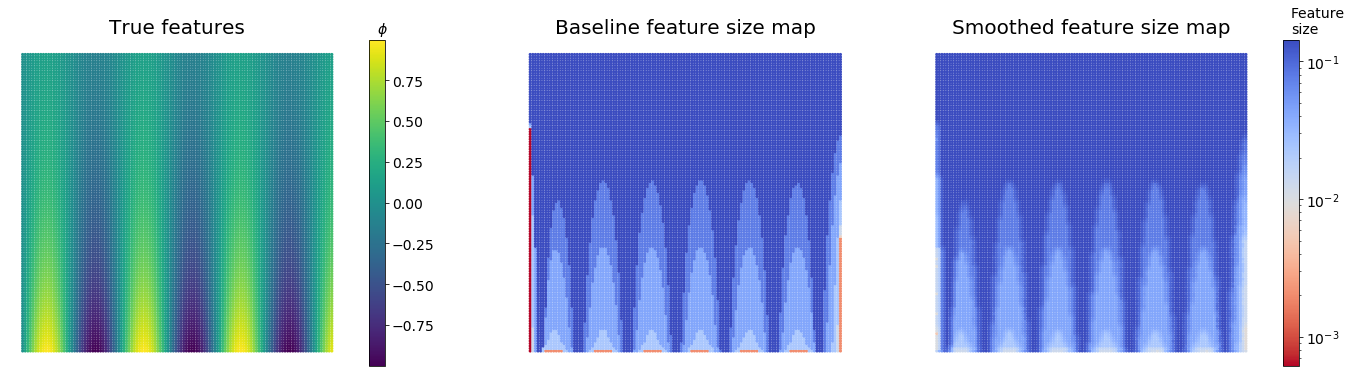

In [19]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-1.png', dpi=300, bbox_inches='tight')

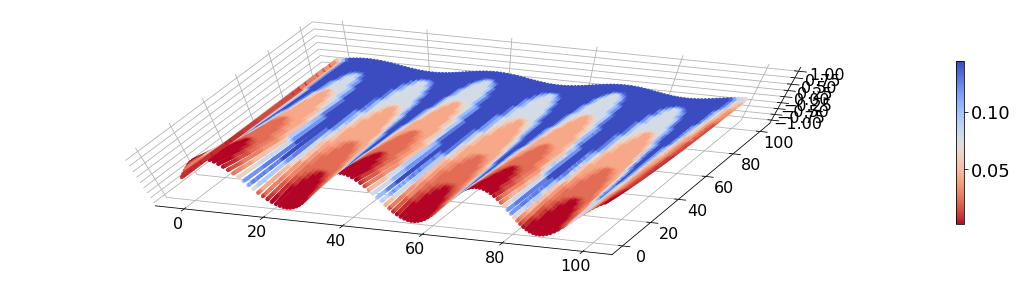

In [9]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi, 
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 2

In [10]:
phi = xy[:,0:1]**2

In [11]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 13 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.4832930238571752
where the normalized variance derivative is equal to:
1.0


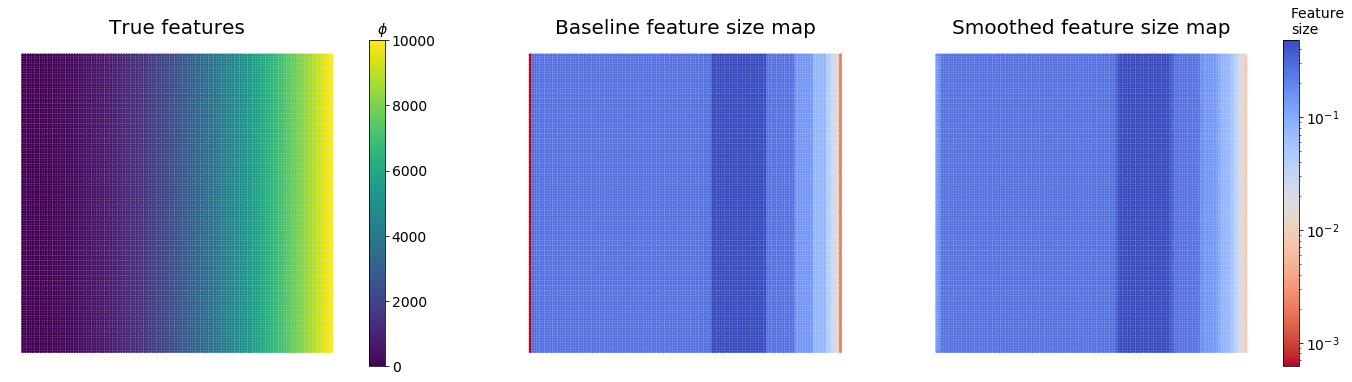

In [12]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-2.png', dpi=300, bbox_inches='tight')

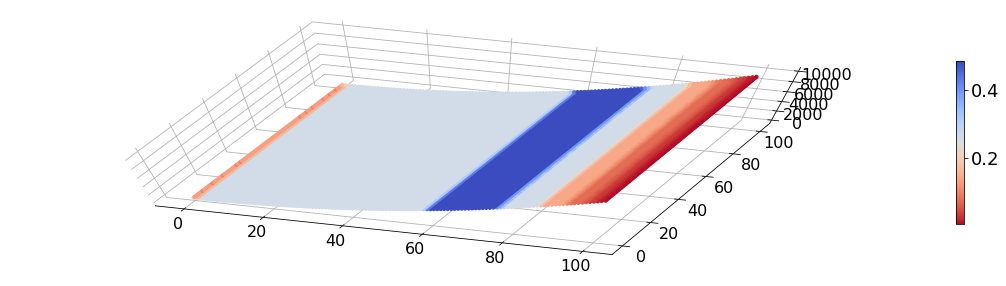

In [13]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 3

In [14]:
phi = np.exp(-((x*x+y*y) / (2600)))
phi = phi[:,None]
phi = phi/np.max(phi)

In [15]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 13 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.4832930238571752
where the normalized variance derivative is equal to:
1.0


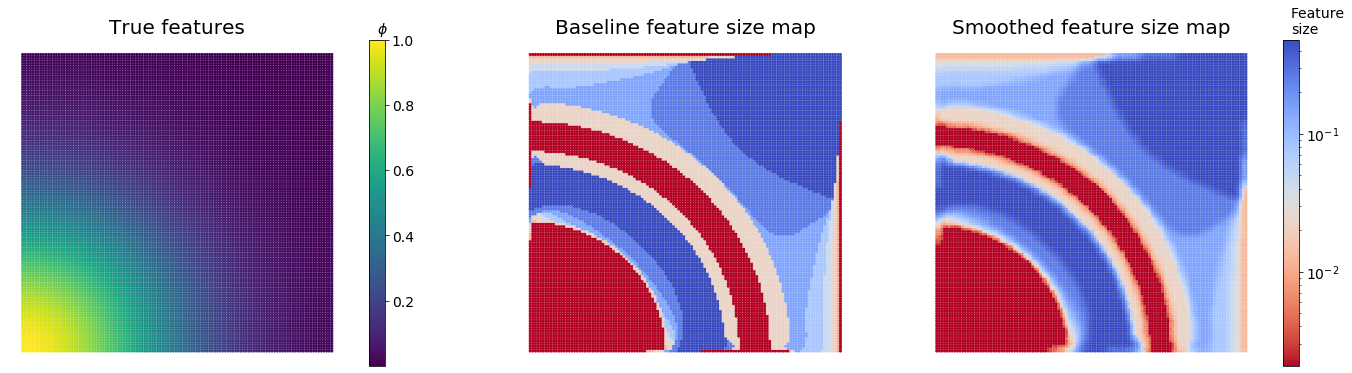

In [16]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=15)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-3.png', dpi=300, bbox_inches='tight')

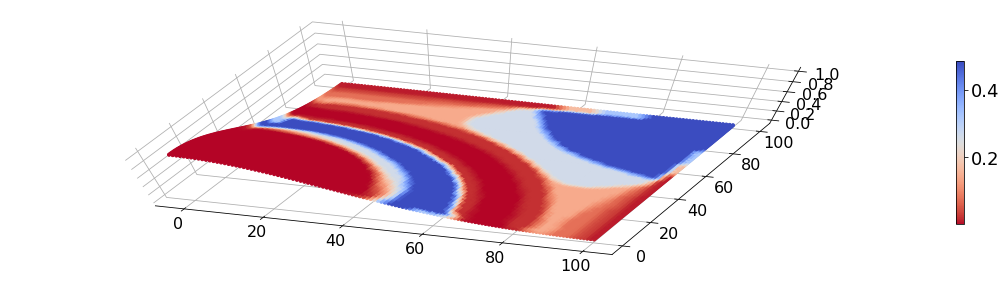

In [17]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 4

In [18]:
phi = np.exp(-((x*x+y*y) / (2.0 * 80**2))) * np.sin(0.001*x*y)
phi = phi.ravel()[:,None]
phi = phi/np.max(phi)

In [19]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.3 minutes.
----------------------------------------


Rightmost peak at index 12 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.26366508987303583
where the normalized variance derivative is equal to:
1.0


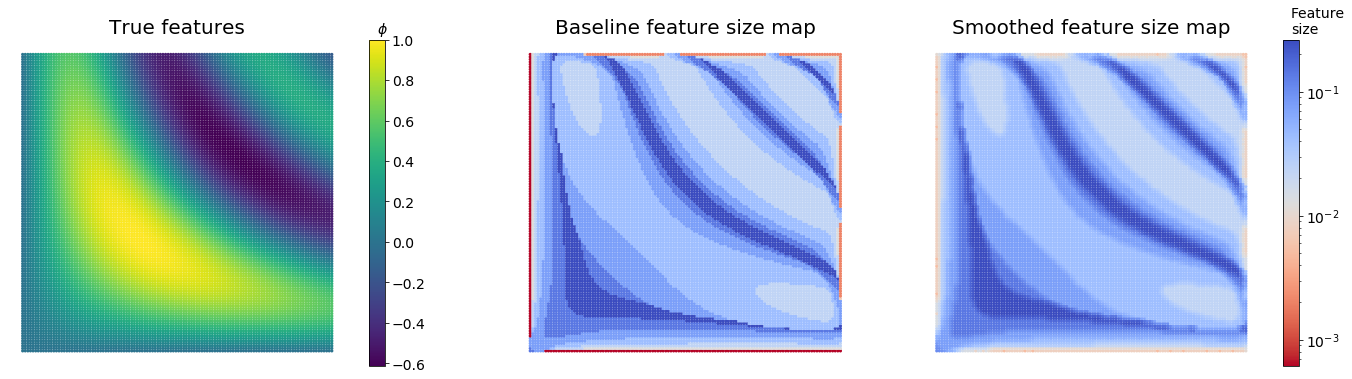

In [20]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-4.png', dpi=300, bbox_inches='tight')

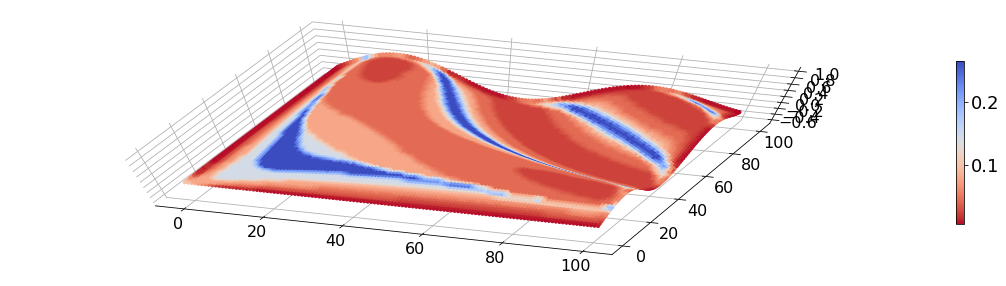

In [21]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 5

In [22]:
phi = np.exp(-((x*x+y*y) / (2.0 * 80**2))) * np.sin(0.005*x*y)
phi = phi.ravel()[:,None]
phi = phi/np.max(phi)

In [23]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 10 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.07847599703514607
where the normalized variance derivative is equal to:
1.0


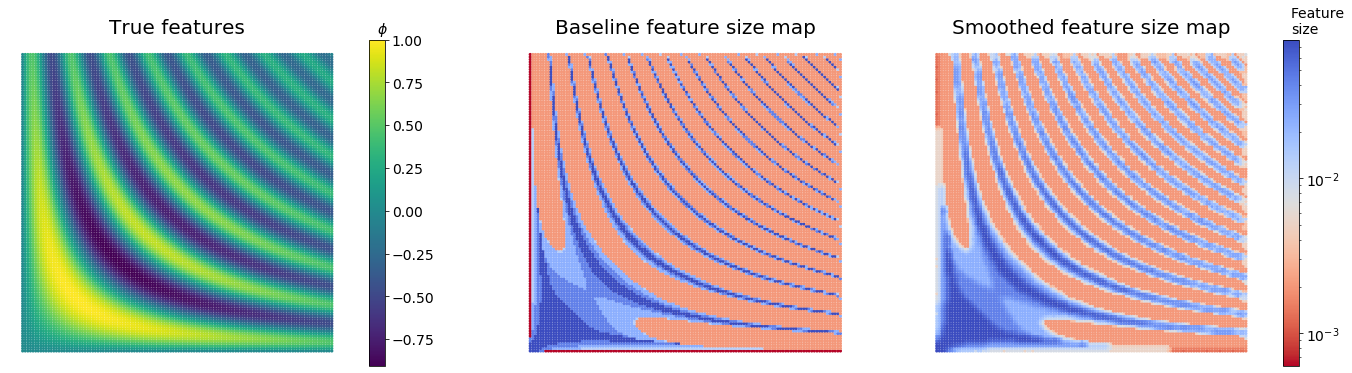

In [24]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-5.png', dpi=300, bbox_inches='tight')

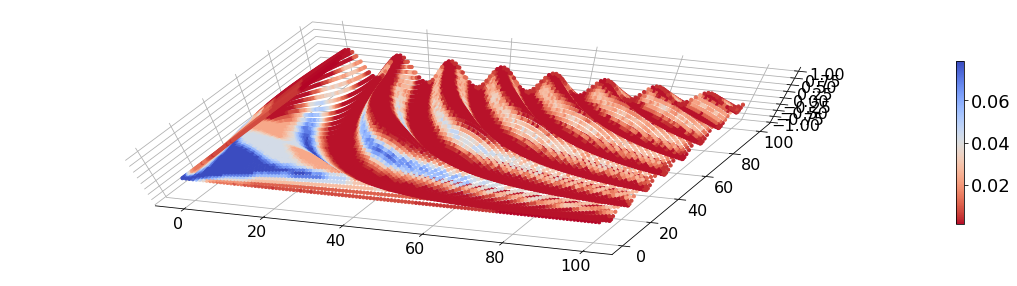

In [25]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 6

In [26]:
phi = np.sin(0.3*x)
phi = phi.ravel()[:,None]
phi = phi/np.max(phi)

In [27]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 10 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.07847599703514607
where the normalized variance derivative is equal to:
1.0


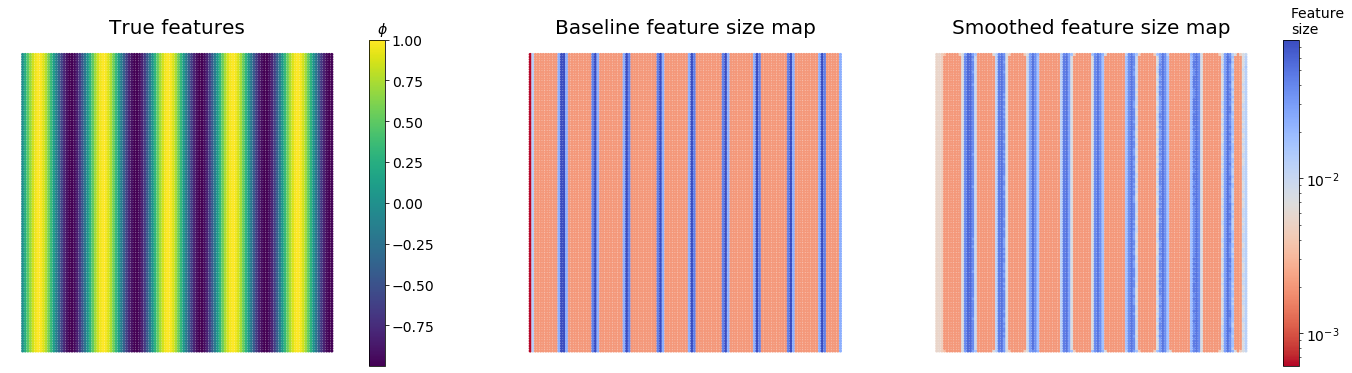

In [28]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-6.png', dpi=300, bbox_inches='tight')

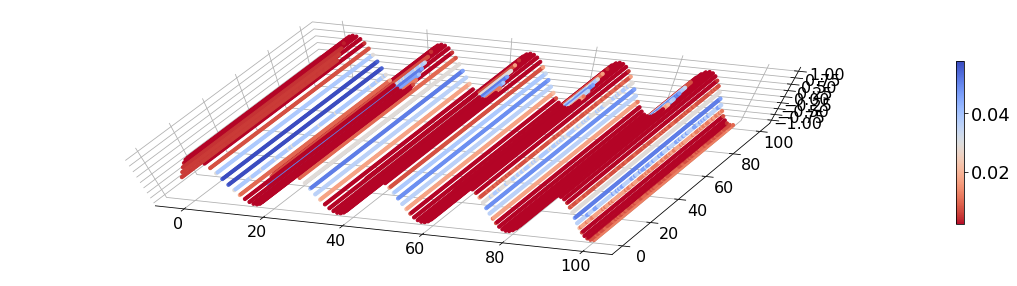

In [29]:
reduction.plot_3d_manifold(xy[:,0], 
                           xy[:,1], 
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map, 
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 7

In [30]:
phi = x
phi = phi.ravel()[:,None]
phi = phi/np.max(phi)

In [31]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 14 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.8858667904100823
where the normalized variance derivative is equal to:
1.0


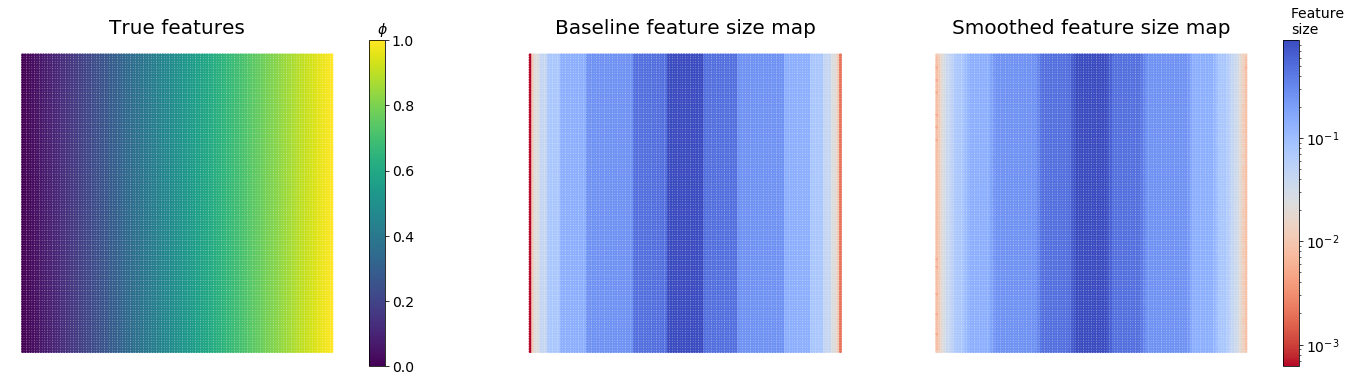

In [32]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='mean', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-7.png', dpi=300, bbox_inches='tight')

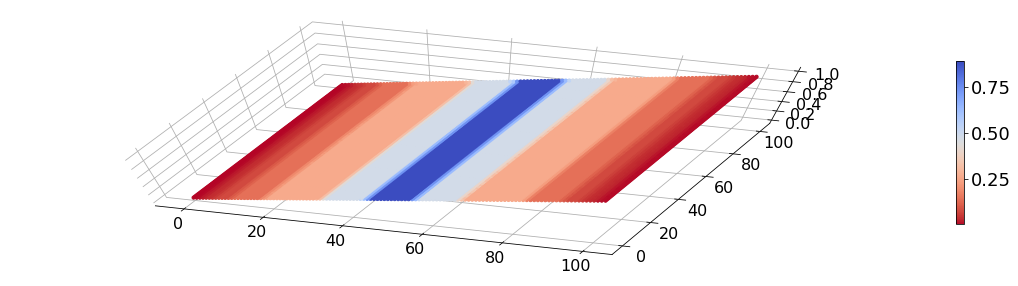

In [33]:
reduction.plot_3d_manifold(xy[:,0],
                           xy[:,1],
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map,
                           color_map='coolwarm_r', figure_size=(20,5));

### Dataset 8

In [39]:
phi = np.zeros_like(x)
phi[(x>25) & (x<75) & (y>25) & (y<75)] = 1
phi = phi.ravel()[:,None]
phi = phi/np.max(phi)

In [40]:
tic = time.perf_counter()

variance_data = analysis.compute_normalized_variance(xy,
                                                     depvars=phi,
                                                     depvar_names=['phi'],
                                                     bandwidth_values=bandwidth_values)

toc = time.perf_counter()
print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 0.2 minutes.
----------------------------------------


Rightmost peak at index 12 is used as the starting bandwidth.

Feature sizes will be computed starting from size:
0.26366508987303583
where the normalized variance derivative is equal to:
1.0


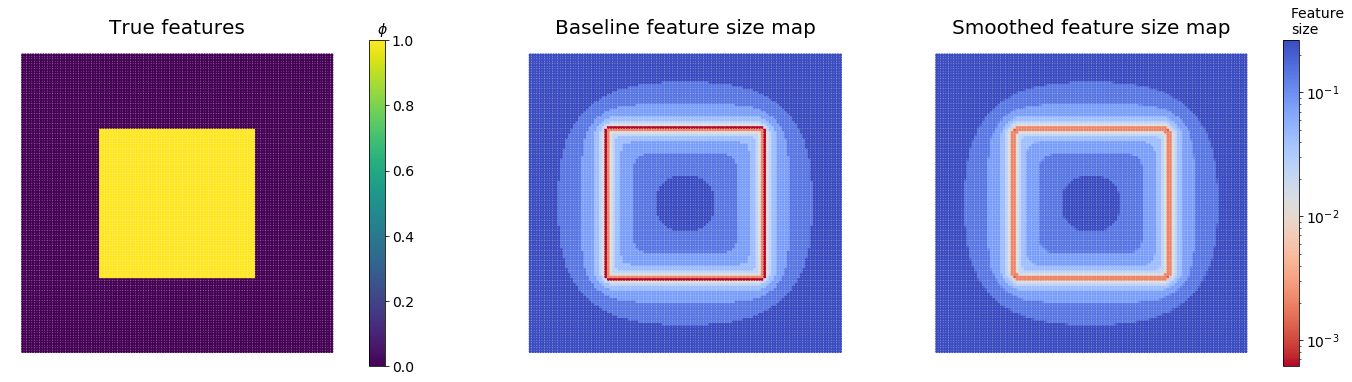

In [43]:
feature_size_map = analysis.feature_size_map(variance_data, variable_name='phi', cutoff=cutoff, starting_bandwidth_idx='peak', verbose=True)
smooth_feature_size_map = analysis.feature_size_map_smooth(xy, feature_size_map, method='median', n_neighbors=8)
plt = plot_feature_size_maps(xy, phi, feature_size_map, smooth_feature_size_map, s=10)
if save_plots: plt.savefig('../images/tutorial-estimating-feature-sizes-dataset-8.png', dpi=300, bbox_inches='tight')

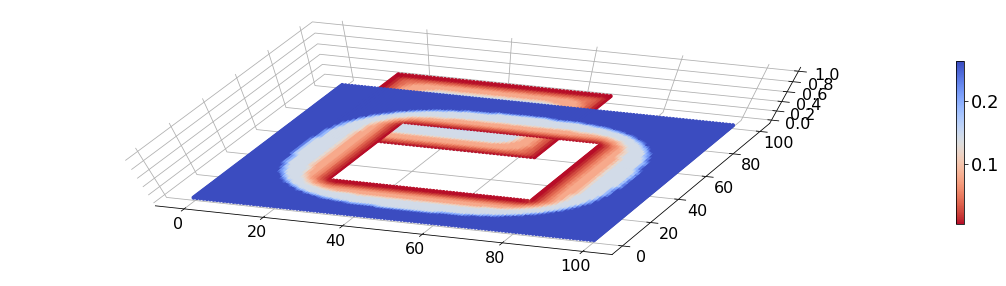

In [42]:
reduction.plot_3d_manifold(xy[:,0],
                           xy[:,1],
                           phi,
                           azim=-70,
                           elev=70,
                           color=smooth_feature_size_map,
                           color_map='coolwarm_r', figure_size=(20,5));

<module 'matplotlib.pyplot' from '/Users/kamilazdybal/anaconda3/envs/spitfire/lib/python3.7/site-packages/matplotlib/pyplot.py'>

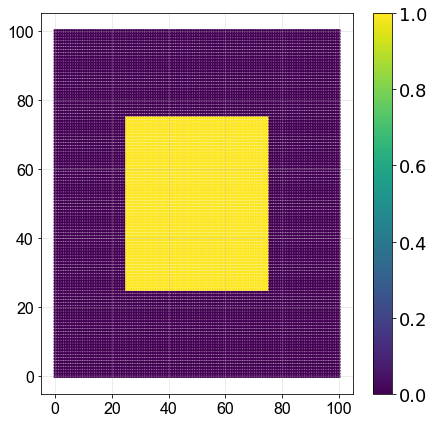

In [36]:
reduction.plot_2d_manifold(xy[:,0], xy[:,1], color=phi)

***